# **Retail Store Inventory Dataset Analysis Using Pandas** -- (Undergoing...)


---



Dataset's Kaggle link: https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset

Steps to get a dataset from Kaggle into Colab ([YouTube demo link](https://https://www.youtube.com/watch?v=s9O6soJES74))

1. Login to Kaggle account.
2. Go to **Settings**.
3. Scroll down to find section called **'API'.**
4. Once there, click the button **'Create New Token'**.
5. A *.json* file containing the API key is saved locallly.
6. Open that file in notepad (or any text editor) and note the values for **'username'** and **'key'**.
7. Follow the steps below.

In [25]:
!pip install opendatasets > /dev/null  # '> /dev/null' hides the long output, though the package is installed successfully

In [26]:
import opendatasets as od

In [28]:
# Prompts to enter your Kaggle username and API key; post correct login, file is downloaded to folder icon on LHS of Colab
# If file is already downloaded, output of code is :
# 'Skipping, found downloaded files in "./retail-store-inventory-forecasting-dataset" (use force=True to force download)'

od.download('https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: eddantes
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset


100%|██████████| 1.51M/1.51M [00:00<00:00, 119MB/s]

In [2]:
import pandas as pd

In [155]:
df = pd.read_csv('/content/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv')

In [156]:
df.head(3)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer


**Above o/p shows index is starting from 0 but we will reset it to begin from 1.**

In [4]:
df.index = df.index + 1

# Following 2 lines can also reset the index range

# import numpy as np
# df.index = np.arange(1, len(df)+1)  # len(df) = 73100

In [158]:
df.head(3) # Index reset to begin from 1

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
1,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
2,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
3,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer


In [159]:
# df.index.dtype  # o/p : dtype('int64')
df.index.dtype.name

'int64'

**Some other methods for premiliary checks are as follows. One can run them individually.**

In [ ]:
'''Methods for preliminary checks'''

# df.shape              # o/p : (73100, 15)
# df.info()             # Shows df shape, col names, their non-null val count, & dtypes
# df.dtypes             # Col names & their dtypes
# df.describe()         # Statistical data about df's numeric cols
# df.axes               # List of row axis' and col axis' labels, in that order
# df.index              # List of labels in index col
# df.columns            # List of all col labels
# df.keys()             # List of all col labels
# df.index.name         # Label of index col
# df.index.names        # Labels of multi-col index, aka multi-index
# df.ndim               # No. of dimensions in df (2 here)
# df.memory_usage()     # Memory usage of each col in bytes
# df.select_dtypes(exclude = 'object')        # include/exclude cols of specified dtypes

In [160]:
df.info() # O/P shows it's mostly a cleaned dataset; dtype of col 'Date' can be changed to datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 1 to 73100
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

**Changing dtype of** Date **column.**

In [161]:
df['Date'].dtype.name # dtype of 'Date' col

'object'

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')  # Changing dtype of 'Date' col

# df['Date'].dtype   # o/p: dtype('<M8[ns]')
# df['Date'].dtype.name  # o/p: datetime64[ns]

**Adding year and month columns:**

In [6]:
# Now that 'Date' column's dtype is of datetime type, we can use '.dt' accessor to extract year, month, day etc.

df['SalesYear'] = df['Date'].dt.year
df['SalesMonth'] = df['Date'].dt.month_name()

In [7]:
# Shifting cols 'SalesYear' & 'SalesMonth' beside 'Date' col
cols = df.columns.tolist()
cols = [cols[0], *cols[-2:], *cols[1:-2]]  # creating new cols list by using cols' position
df = df[cols]

In [8]:
df.head(1) # Just checking the cols

,Date,SalesYear,SalesMonth,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
1,2022-01-01,2022,January,S001,P0001,Groceries,North,231,127,55,135.47,33.5,20,Rainy,0,29.69,Autumn


**Standardizing the column names:**

In [166]:
df.columns # original col names

Index(['Date', 'SalesYear', 'SalesMonth', 'Store ID', 'Product ID', 'Category',
       'Region', 'Inventory Level', 'Units Sold', 'Units Ordered',
       'Demand Forecast', 'Price', 'Discount', 'Weather Condition',
       'Holiday/Promotion', 'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [9]:
df.columns = [col.replace(' ', '') for col in df.columns]
df.rename(columns = {'Holiday/Promotion': 'HolidayPromotion'}, inplace=True)

In [10]:
df.columns  # new col names

Index(['Date', 'SalesYear', 'SalesMonth', 'StoreID', 'ProductID', 'Category',
       'Region', 'InventoryLevel', 'UnitsSold', 'UnitsOrdered',
       'DemandForecast', 'Price', 'Discount', 'WeatherCondition',
       'HolidayPromotion', 'CompetitorPricing', 'Seasonality'],
      dtype='object')

**Replacing the values 0 and 1 in column** HolidayPromotion **to NO and YES, respectively:**

In [169]:
df['HolidayPromotion'] = df['HolidayPromotion'].replace({0: 'NO', 1: 'YES'})
df['HolidayPromotion'].head(3)

,HolidayPromotion
1,NO
2,NO
3,YES


# **Data Analysis**

### What are the trends in units sold over time for different categories?

In [13]:
sales_trend = df.groupby(['Date', 'Category'])['UnitsSold'].sum().unstack(level = 1)
sales_trend

Category,Clothing,Electronics,Furniture,Groceries,Toys
Date,,,,,
2022-01-01,3784,3440,1738,3112,2410
2022-01-02,2326,2555,2108,2817,3609
2022-01-03,2524,3339,1146,3509,3163
2022-01-04,2280,2798,2522,2490,3994
2022-01-05,1387,2655,2398,2099,4033
...,...,...,...,...,...
2023-12-28,2586,2610,4122,3745,3208
2023-12-29,1692,3330,2799,2546,3001
2023-12-30,1776,1656,4359,2503,2862


### Extract the highest average unit sales by region and categories.

In [67]:
tmp = df.groupby(['Region', 'Category', 'SalesYear'])['UnitsSold'].mean().unstack(level = [1,2])
tmp

Category     Clothing                         Electronics              \
SalesYear        2022        2023        2024        2022        2023   
Region                                                                  
East       135.836538  134.713600   59.166667  135.554709  134.260473   
North      133.280156  134.162710   69.000000  137.281706  139.899444   
South      139.040884  140.828804   93.000000  136.013866  131.209005   
West       137.870381  137.891258  160.800000  132.545008  133.297586   

Category                Furniture                           Groceries  \
SalesYear        2024        2022        2023        2024        2022   
Region                                                                  
East       179.833333  137.860022  139.624862  185.333333  135.850925   
North      129.571429  139.395411  137.251630  198.333333  135.630946   
South       52.500000  138.023008  140.761328   70.250000  138.017003   
West       162.571429  134.586580  134.296619  171.000000  140.293695   

Category                                 Toys                          
SalesYear        2023        2024        2022        2023        2024  
Region                                                                 
East       143.169924   92.000000  137.141999  134.819989  129.000000  
North      132.419053  111.571429  138.475517  135.469625   93.875000  
South      136.900495  155.000000  133.857143  135.991772  160.500000  
West       132.961342  153.250000  138.630531  133.175830  162.285714

In [25]:
# Or, we can change the WIDE o/p above to a DEEP one
df.groupby(['Region', 'Category', 'SalesYear'])['UnitsSold'].mean().unstack(level = 2)

SalesYear                 2022        2023        2024
Region Category                                       
East   Clothing     135.836538  134.713600   59.166667
       Electronics  135.554709  134.260473  179.833333
       Furniture    137.860022  139.624862  185.333333
       Groceries    135.850925  143.169924   92.000000
       Toys         137.141999  134.819989  129.000000
North  Clothing     133.280156  134.162710   69.000000
       Electronics  137.281706  139.899444  129.571429
       Furniture    139.395411  137.251630  198.333333
       Groceries    135.630946  132.419053  111.571429
       Toys         138.475517  135.469625   93.875000
South  Clothing     139.040884  140.828804   93.000000
       Electronics  136.013866  131.209005   52.500000
       Furniture    138.023008  140.761328   70.250000
       Groceries    138.017003  136.900495  155.000000
       Toys         133.857143  135.991772  160.500000
West   Clothing     137.870381  137.891258  160.800000
       Electronics  132.545008  133.297586  162.571429
       Furniture    134.586580  134.296619  171.000000
       Groceries    140.293695  132.961342  153.250000
       Toys         138.630531  133.175830  162.285714

In [23]:
# 'pivot_table()' also yields the above o/p & its syntax clearly conveys what the o/p will contain

df.pivot_table(index = ['Region', 'Category'], columns = 'SalesYear', values = 'UnitsSold', aggfunc = 'mean')

SalesYear                 2022        2023        2024
Region Category                                       
East   Clothing     135.836538  134.713600   59.166667
       Electronics  135.554709  134.260473  179.833333
       Furniture    137.860022  139.624862  185.333333
       Groceries    135.850925  143.169924   92.000000
       Toys         137.141999  134.819989  129.000000
North  Clothing     133.280156  134.162710   69.000000
       Electronics  137.281706  139.899444  129.571429
       Furniture    139.395411  137.251630  198.333333
       Groceries    135.630946  132.419053  111.571429
       Toys         138.475517  135.469625   93.875000
South  Clothing     139.040884  140.828804   93.000000
       Electronics  136.013866  131.209005   52.500000
       Furniture    138.023008  140.761328   70.250000
       Groceries    138.017003  136.900495  155.000000
       Toys         133.857143  135.991772  160.500000
West   Clothing     137.870381  137.891258  160.800000
       Electronics  132.545008  133.297586  162.571429
       Furniture    134.586580  134.296619  171.000000
       Groceries    140.293695  132.961342  153.250000
       Toys         138.630531  133.175830  162.285714

### What's the seasonal average unit sales trend?

In [56]:
seasonal_sales_trend = df.groupby(['WeatherCondition', 'Seasonality'])['UnitsSold'].mean().unstack(level = 1)

Seasonality,Autumn,Spring,Summer,Winter
WeatherCondition,,,,
Cloudy,138.026871,133.881120,136.834844,138.381830
Rainy,137.349597,135.013357,133.441240,134.837178
Snowy,137.797953,135.853184,133.493077,136.517241
Sunny,137.963382,138.588299,138.011214,137.554334


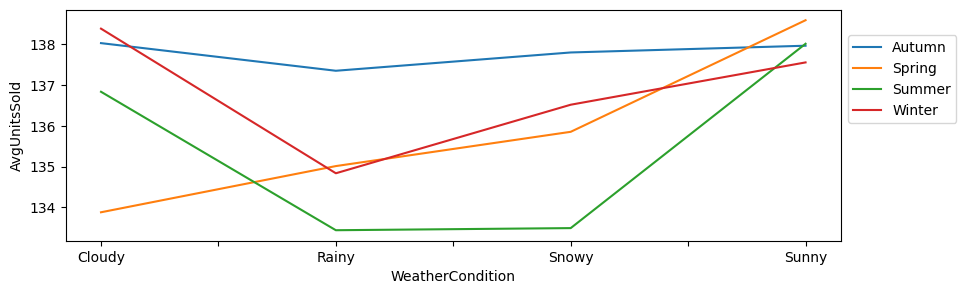

In [77]:
seasonal_sales_trend.plot(kind = 'line', ylabel='AvgUnitsSold', figsize = (10,3)).legend(loc='center left', bbox_to_anchor = (1.0, 0.7))



---



### What's the highest unit sales for each category in every quarter of the year 2023?

**Hardcoded solution:**

In [140]:
year_2023 = df[df['SalesYear'] == 2023]   # Creating frame 'year_2023' having all rows for SalesYear = 2023

qtr_list = year_2023['Date'].dt.quarter.unique().tolist()   # [1, 2, 3, 4]
category_name = year_2023['Category'].unique().tolist()     # ['Clothing', 'Toys', 'Groceries', 'Furniture', 'Electronics']

qtr_cat = [(x, y) for x in qtr_list for y in category_name]  # Packing all combos of quarters & categories in a list

for qtr, cat in qtr_cat:  # Iterating over each pair of vals in 'qtr_cat'
  qtr_max_sale = year_2023[(year_2023['Date'].dt.quarter == qtr) & (year_2023['Category'] == cat)].agg({'UnitsSold':'max'})
  print('2023 Qtr:', qtr, ', Max Sales:', qtr_max_sale.iloc[0], 'units, Category:', cat)

2023 Qtr: 1 , Max Sales: 478 units, Category: Clothing
2023 Qtr: 1 , Max Sales: 495 units, Category: Toys
2023 Qtr: 1 , Max Sales: 494 units, Category: Groceries
2023 Qtr: 1 , Max Sales: 488 units, Category: Furniture
2023 Qtr: 1 , Max Sales: 487 units, Category: Electronics
2023 Qtr: 2 , Max Sales: 471 units, Category: Clothing
2023 Qtr: 2 , Max Sales: 488 units, Category: Toys
2023 Qtr: 2 , Max Sales: 488 units, Category: Groceries
2023 Qtr: 2 , Max Sales: 499 units, Category: Furniture
2023 Qtr: 2 , Max Sales: 484 units, Category: Electronics
2023 Qtr: 3 , Max Sales: 475 units, Category: Clothing
2023 Qtr: 3 , Max Sales: 479 units, Category: Toys
2023 Qtr: 3 , Max Sales: 488 units, Category: Groceries
2023 Qtr: 3 , Max Sales: 487 units, Category: Furniture
2023 Qtr: 3 , Max Sales: 484 units, Category: Electronics
2023 Qtr: 4 , Max Sales: 478 units, Category: Clothing
2023 Qtr: 4 , Max Sales: 479 units, Category: Toys
2023 Qtr: 4 , Max Sales: 494 units, Category: Groceries
2023 Qtr: 

**Pandas solution:**

In [142]:
year_2023 = df[df['SalesYear'] == 2023]
tmp = year_2023.groupby([df['Date'].dt.quarter, 'Category'])['UnitsSold'].max().unstack(level = 1)
tmp

Category,Clothing,Electronics,Furniture,Groceries,Toys
Date,,,,,
1,478,487,488,494,495
2,471,484,499,488,488
3,475,484,487,488,479
4,478,481,485,494,479


**Let's plot the trend.**

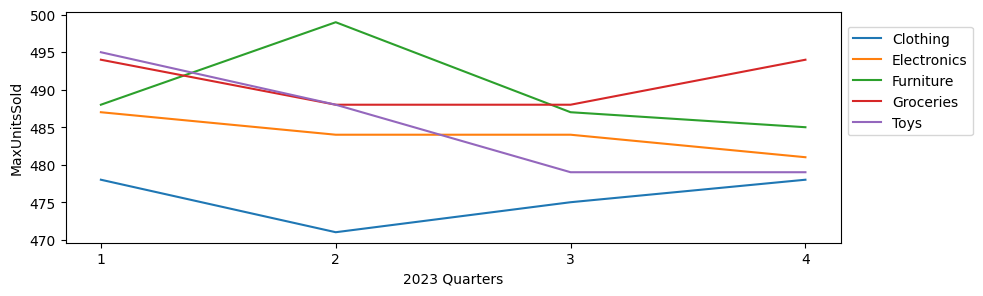

In [153]:
tmp.plot(kind = 'line', xlabel = '2023 Quarters', xticks=[1,2,3,4], ylabel='MaxUnitsSold',
         figsize = (10,3)).legend(loc='center left', bbox_to_anchor = (1.0, 0.7))

### What's the correlation among product's pricing, competitor pricing & units of products sold?

In [166]:
df[['Price', 'CompetitorPricing', 'UnitsSold']].corr(method = 'pearson') # default 'method' is 'pearson'; needn't use 'method'

,Price,CompetitorPricing,UnitsSold
Price,1.000000,0.993900,0.001082
CompetitorPricing,0.993900,1.000000,0.001259
UnitsSold,0.001082,0.001259,1.000000


### What is the quarterly revenue generated over the years?

**Method-1:**

In [2]:
def calc_revenue(units, price, discount):      # Fn to calculate revenue
  return units * price * round((1 - discount / 100), 2)

df_tmp = pd.DataFrame()  # Create a blank frame

# Add columns to frame 'df_tmp'
df_tmp['Year'] = df['Date'].dt.year
df_tmp['Quarter'] = df['Date'].dt.quarter

df_tmp['Revenue'] = calc_revenue(df['UnitsSold'], df['Price'], df['Discount'])

df_tmp.head()

,Year,Quarter,Revenue
1,2022,1,3403.600
2,2022,1,7561.200
3,2022,1,1637.415
4,2022,1,1796.328
5,2022,1,1030.960


In [3]:
pd.options.display.float_format = '{:.2f}'.format # Comment this line, run cell again; o/p vals will be in scientific notation

df_tmp.groupby(['Year', 'Quarter'])['Revenue'].sum().unstack(level = 1)

Quarter,1,2,3,4
Year,,,,
2022,61503249.18,61838751.91,62978102.36,62134770.88
2023,60897398.27,60970991.95,61749865.01,62270102.60
2024,628142.78,NaN,NaN,NaN


**Method-2** -- **Calling a custom function in** 'aggfunc' **property of** pivot_table()

In [28]:
def calc_revenue(units, price, discount):
  return units * price * round((1 - discount / 100), 2)

df.pivot_table(index = 'SalesYear',             # ['SalesYear', 'Category'] will yield multi-index o/p
               columns = df['Date'].dt.quarter.rename('Quarter'),
               values = 'UnitsSold',
               aggfunc = lambda x: calc_revenue(x,         # x iterates over each value of 'UnitsSold' in 'values'
                                                df.loc[x.index, 'Price'],
                                                df.loc[x.index, 'Discount']).sum())


Quarter,1,2,3,4
SalesYear,,,,
2022,61503249.18,61838751.92,62978102.36,62134770.88
2023,60897398.27,60970991.95,61749865.01,62270102.60
2024,628142.78,NaN,NaN,NaN


In [29]:
df.head()

,Date,SalesYear,SalesMonth,StoreID,ProductID,Category,Region,InventoryLevel,UnitsSold,UnitsOrdered,DemandForecast,Price,Discount,WeatherCondition,HolidayPromotion,CompetitorPricing,Seasonality
1,2022-01-01,2022,January,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,NO,29.69,Autumn
2,2022-01-01,2022,January,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,NO,66.16,Autumn
3,2022-01-01,2022,January,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,YES,31.32,Summer
4,2022-01-01,2022,January,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,YES,34.74,Autumn
5,2022-01-01,2022,January,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,NO,68.95,Summer


### What's the category-wise cumulative sales throughout the first 3 quarters of 2022?

In [2]:
# prompt: what's the category wise cumulative sales throughout the first 3 quarters of 2022? Show the quarters too.

# Filter data for 2022
df_2022 = df[df['SalesYear'] == 2022]

# Filter data for the first three quarters
df_2022_q1_q3 = df_2022[df_2022['Date'].dt.quarter <= 3]

# Calculate cumulative sales by category and quarter
cumulative_sales = df_2022_q1_q3.groupby(['Category', 'Date'])['UnitsSold'].sum().reset_index()
cumulative_sales['CumulativeUnitsSold'] = cumulative_sales.groupby('Category')['UnitsSold'].cumsum()

# Display the results
cumulative_sales[['Category', 'Date', 'UnitsSold', 'CumulativeUnitsSold']]

,Category,Date,UnitsSold,CumulativeUnitsSold
0,Clothing,2022-01-01,3784,3784
1,Clothing,2022-01-02,2326,6110
2,Clothing,2022-01-03,2524,8634
3,Clothing,2022-01-04,2280,10914
4,Clothing,2022-01-05,1387,12301
...,...,...,...,...
1360,Toys,2022-09-26,3170,738980
1361,Toys,2022-09-27,3143,742123
1362,Toys,2022-09-28,2496,744619
1363,Toys,2022-09-29,4541,749160


*Keeping all data loading & transformation code in one cell for quick reloading in case of abrupt Colab session termination:*

In [1]:
import pandas as pd

# Loading the data's copy from local machine instead of from Kaggle
df = pd.read_csv('/content/retail_store_inventory.csv')

df.index = df.index + 1  # Resetting index to begin from 1

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')  # Changing 'Date' col's dtype to datetime

df['SalesYear'] = df['Date'].dt.year             # Adding col for year
df['SalesMonth'] = df['Date'].dt.month_name()    # Adding col for month's name

# Shifting newly added 'SalesYear' & 'SalesMonth' columns beside the 'Date' col
cols = df.columns.tolist()
cols = [cols[0], *cols[-2:], *cols[1:-2]]  # Creating new cols list by using cols' position
df = df[cols]

df.columns = [col.replace(' ','') for col in df.columns]  # Removing spaces & '/' in column names
df.rename(columns = {'Holiday/Promotion': 'HolidayPromotion'}, inplace=True)

df['HolidayPromotion'] = df['HolidayPromotion'].replace({0: 'NO', 1: 'YES'}) # Replacing vals in col 'HolidayPromotion'

In [80]:
# df.to_csv('retail_store_inventory_cleaned.csv', index = False)  # saving a copy of df as .csv